# Word Embeddings

- https://mccormickml.com/2016/04/27/word2vec-resources/
- http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
- http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/
- http://mccormickml.com/2018/06/15/applying-word2vec-to-recommenders-and-advertising/
- https://arxiv.org/pdf/1301.3781.pdf
- https://code.google.com/archive/p/word2vec/

Word Embeddings kelimeleri vektör olarak göstermenin farklı bir yoludur. Amaç, corpus'taki bağlamsal benzerliği koruyarak düşük boyutlu özellik vektörleri tanımlamaktır. 

BOW veya TF-IDF'ye göre sözcük yerleştirme kullanmanın birçok avantajı vardır. 

- En önemlilerinden biri boyutsallık azaltmadır (bir model oluşturmak için gerekli olmayan özelliklerin önemli ölçüde azalması). 

- Bir diğeri, kelimelerin anlamlarını, anlamsal ilişkilerini ve kullanıldıkları farklı bağlam türlerini yakalamaktır.


Word Embeddings bir sonraki kelime tahmini kelimelerin tahmini, speech recognition, autocompletion, machine translation gibi konularda kullanılmaktadır.** 


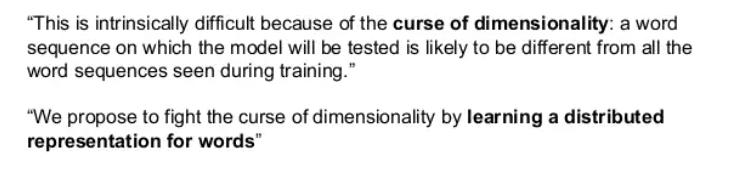
                                                    - Orjinal makale
                                                    
                                                    
                                                    


# Word2Vec

**Word2Vec**, kelime vektörlerini öğrenmek için Google (Mikolov ve ark. 2013) tarafından geliştirilmiş bir unsupervised learning yöntemidir.Yalnızca birkaç katmandan oluşan bir sinir ağı kullananarak kelimeler arasındaki ilişkileri öğrenmeye çalışır ve bunları daha düşük boyutlu bir vektör uzayına gömer. Bunu kelimeleri, **kelimeye ait anlamın bir kısmını yakalayan diğer komşu kelimelere** karşı eğiterek yapar.  

Word2Vec'in arkasındaki ana fikir, vektör uzayında birbirine yakın olan kelime vektörlerinin sadece aynı bağlama sahip değil aynı zamanda benzer anlama da sahip kelimeleri temsil etmesidir. 

Dolayısıyla, çok benzer komşulara sahip iki kelimemiz varsa (yani cümle içerisindeki kullanım bağlamı aşağı yukarı aynıysa), bu kelimeler muhtemelen anlam bakımından oldukça benzerdir ya da oldukça ilişkilidir. 

Örneğin, şoke olmuş, dehşete düşmüş ve şaşırmış sözcükleri genellikle benzer bir bağlamda kullanılır. Bu demektir ki, eğer iki kelime vektörü birbirine yakınsa, bu kelimeler corpusta bağlamlarına göre benzer anlamlara sahip olmalıdır.

Temel olarak bir kelimeyi alarak onun sağ ve sol tarafında belirli pencere (windows size) boyutundaki komşuları ile yakınlık ilişkilerine göre vektör değerlerini belirler. Anlamca yakın kelimeleri vektör uzayında birbirine yakın olacak şekilde konumlandırır. Bu şekilde oluşturulan modele gösterilen yeni metinlerde kelimelere sağ ve sol tarataki komşularına göre yakınsama yaparak kelimelerin anlamları tahmin edilir. 

Belirli bir kelime için alınan benzerlik puanı, kelime vektörü kullanılarak iki belirli kelime arasındaki **cosine similarity** alınarak hesaplanır.


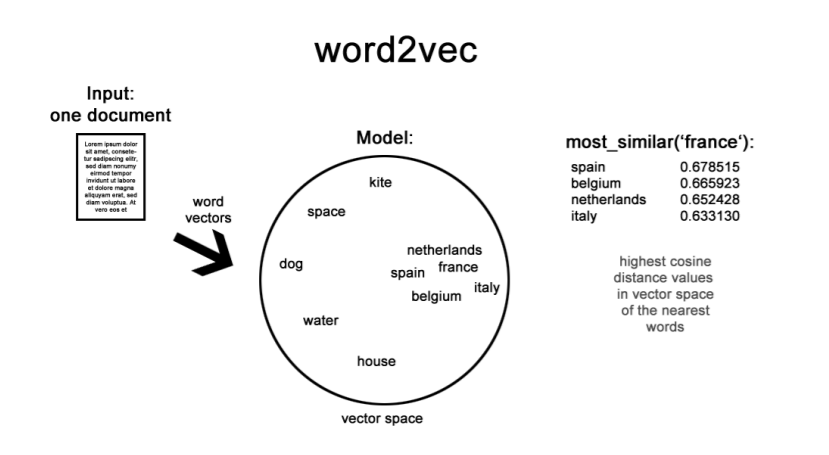
                         - https://odayibasi.medium.com/word2vec-nedir-ne-i%C5%9Fe-yarar-a314a37c45aa

# Model Yapısı

- Word2Vec modelde deep learning modellerinden farklı olarak input layer ve hidden layer arasında bir aktivasyon fonksiyonu bulunmamaktadır.


- Hidden Layer ile Output Layer arasında softmax aktivasyon fonksiyonu uygulanır. Girdi olarak aldığımız bir kelime, o kelimenin çıktısı olan  $e$ ’nin üzerine yazılır. Bir sonraki adımda sonuç tüm  $ e^x  $ lerin toplamına bölünür. Bu işlemin sonucunda corpustaki bütün  benzersiz kelimelerin olasık değerlerini içeren bir vektör elde edilir.

- Word2Vec modellerinde de yapay sinir ağı modellerine benzer olarak başlangıç aşamasında rassal ağırlıklar atanır, forward-propagation yapılır, loss hesaplanır, sonra loss fonkisyonun ağırlıklar cinsinden türevi alınarak back-propagation algoritması uygulanır ve ağırlıklar update edilir. Bu işlem epoch sayısı kadar yapılır. 

Default olarak Word2Vec, epoch sayısını 5 olarak almıştır. Epoch sayısını 15–20'ye kadar artırmak modelin performans sayısını yükseltebilir.

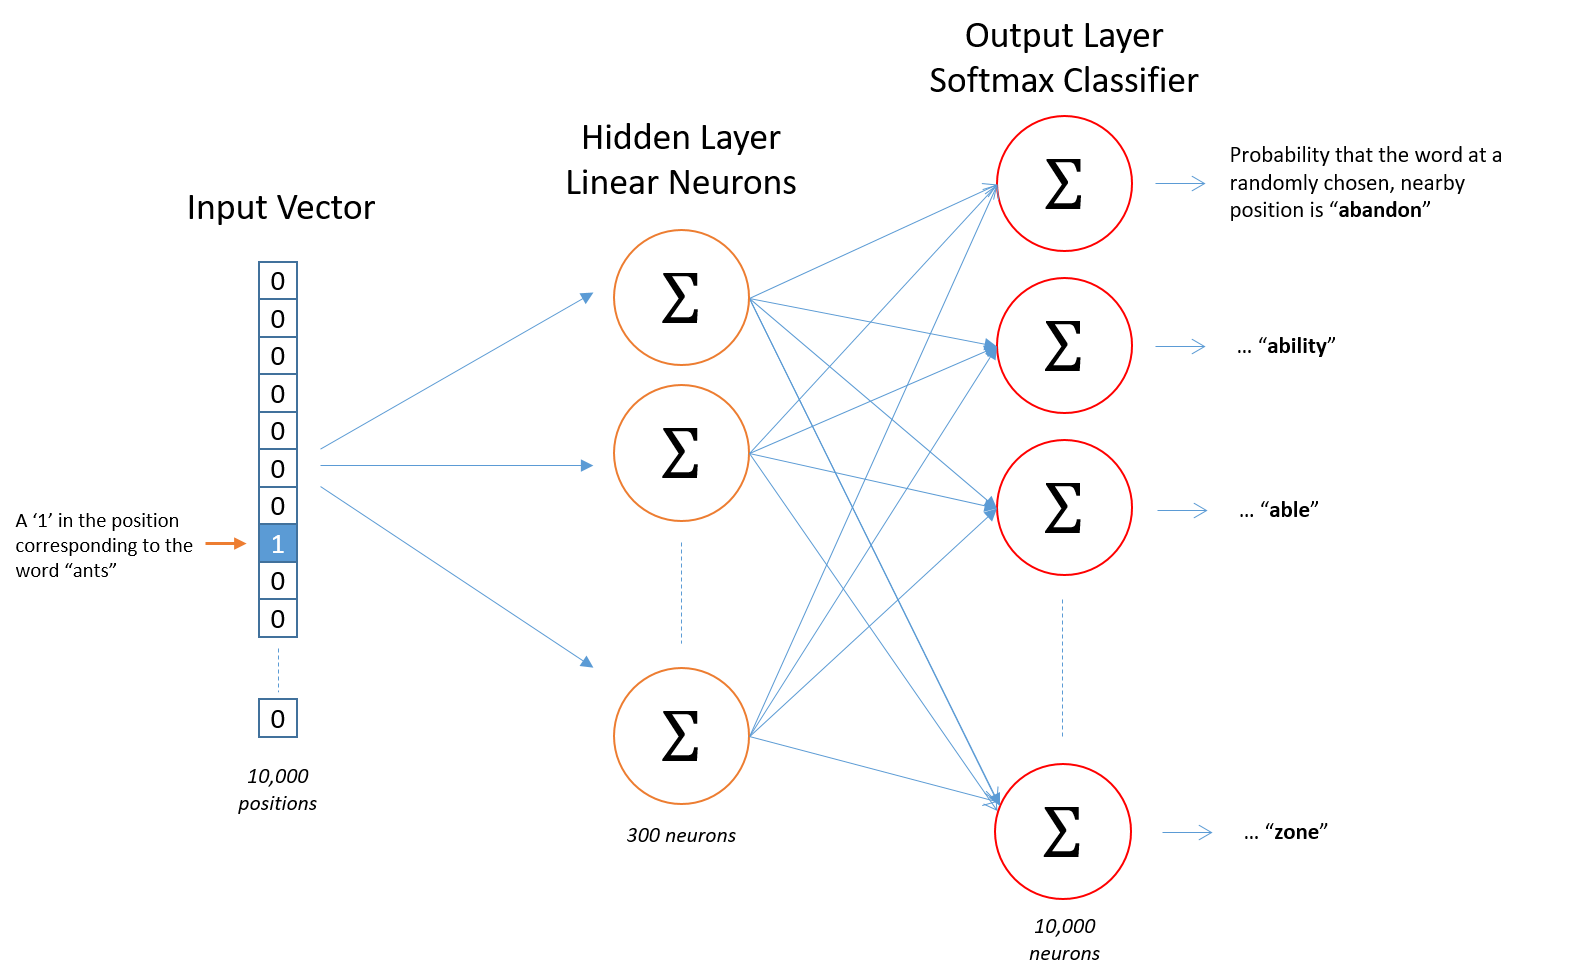
                           - http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/

### Hiperparametreler


- **min_count:** Toplam frekansı bu sayıdan daha düşük olan tüm kelimeleri yok sayar. Min_count için varsayılan değer 5'tir.


- **vector_size:** Kelime vektörlerinin boyutluluğu. Varsayılan değer 100'dür. Word2Vec için vektör boyutunun 300-400 arası olması önerilmektedir.


- **workers:** Modeli eğitmek için kullanılacak worker sayısı (çok çekirdekli makinelerle daha hızlı eğitim amaçlı).


- **windows:** Bircümle içerisinde belirlenen kelimenin sağında ve solunda kaç kelime olabileceğini ifade eder. Word2vec için 5 ile 10 windows size değeri önerilmektedir. 


- **sg:** Eğitim algoritması. 1 ise Skip-gram aksi halde CBOW


Window size Wor2Vec için en önemli hiperparametrelerden bir tanesidir. "Window size" bir cümle içerisinde belirlenen kelimenin sağında ve solunda kaç kelime olabileceğini ifade eder. 

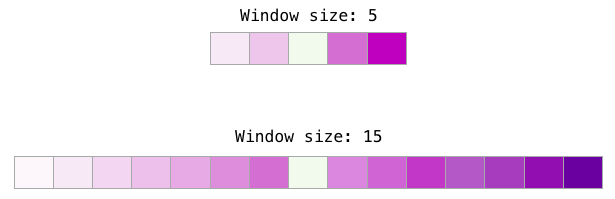
                                   -  http://jalammar.github.io/illustrated-word2vec/

# Word2Vec Algoritmaları

Word2Vec yönteminde **CBOW** ve **Skip-gram** olamk üzere 2 farklı algoritma bulunmaktadır.

<div>
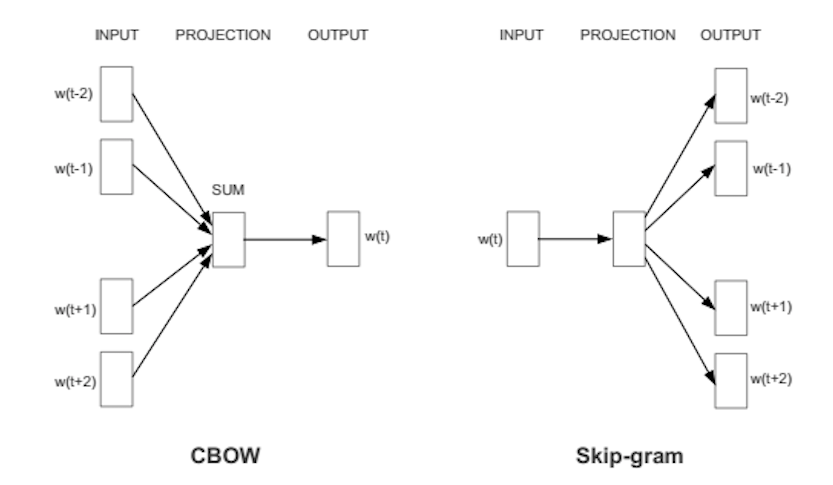
</div>

## **Continuous Bag-of-Words Model**

CBOW yönteminde pencere merkezindeki kelime, kelimenin pencere boyutu (window size) kadar yakınındaki komşularına bakılarak tahmin edilmeye çalışılır. 


<div>
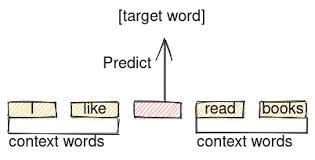
</div>

Standart kelime çantası modelinin aksine, bağlamın sürekli olarak dağıtılmış temsilini kullandığından, bu modeli ayrıca CBOW olarak adlandırılır.



<div>
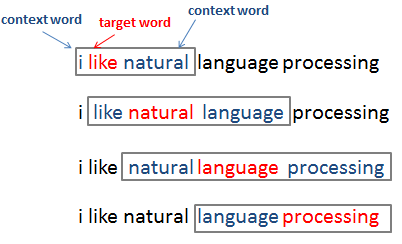
</div>

## **Skip-gram Model**

Skip-gram modeli ise ters şekilde çalışır, pencere merkezinde konumlandırılan belirli bir kelimenin bağlamını / komşularını tahmin etmeye çalışır.

<div>
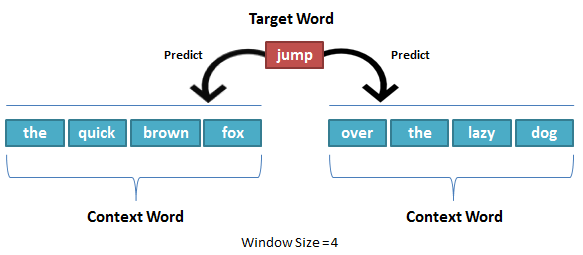
</div>

                                        https://thinkinfi.com/word2vec-skip-gram-explained/

Genel olarak, Skip-gram yöntemi, tek bir kelime için iki semantiği yakalayabildiğinden, CBOW yöntemine kıyasla daha iyi bir performansa sahip olabilir.

Bu yöntemde daha uzak kelimeler genellikle hedef kelimeye yakın olanlardan daha az ilgili olduğundan, eğitim sırasında bu kelimelerden daha az örnek alınarak uzaktaki bu kelimelere daha az ağırlık verilmekte.

# Analogies

En ünlü örnek şu formüldür: “kral” - “erkek” + “kadın”:
Burada birlikte kullanımlarına göre kral için erkek ne ise kadın için de kraliçe odur.

<div>
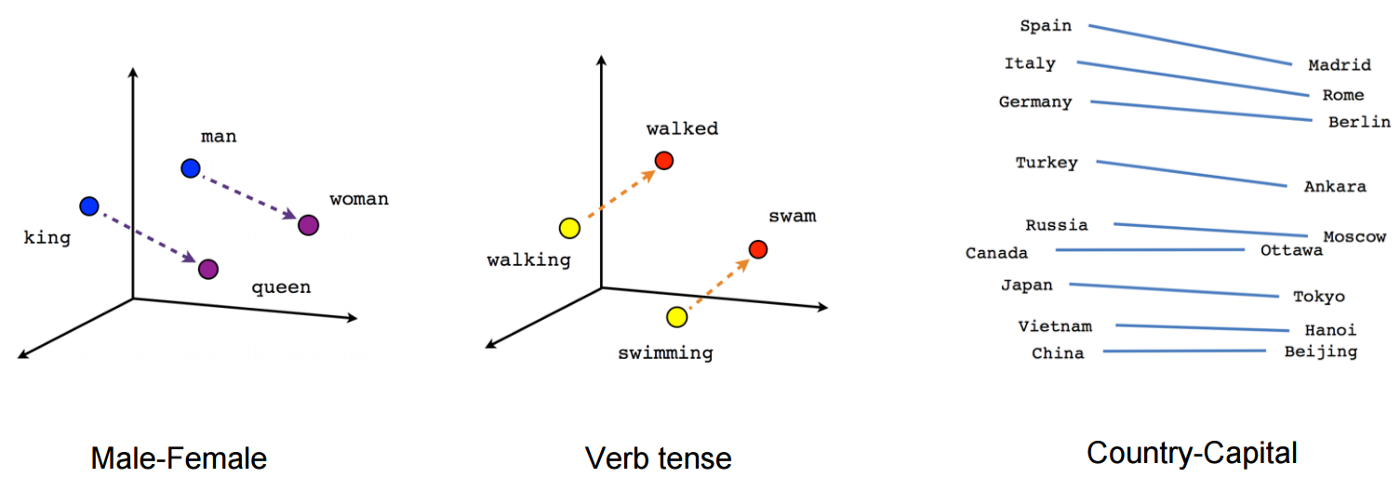
</div>

### Türkçe Wikiedi Verilerinden Eğitilmiş Model

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [3]:
word2vec_sample = str('trmodel') # eğitilmiş model
#https://github.com/akoksal
# https://drive.google.com/drive/folders/1IBMTAGtZ4DakSCyAoA4j7Ch0Ft1aFoww
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=True)

In [4]:
w1=['kral',"kadın"]

In [5]:
w2=["erkek"]

In [6]:
model.most_similar(positive=w1,negative=w2, topn=10)

[('kraliçe', 0.508816123008728),
 ('kralı', 0.4718089997768402),
 ('kralın', 0.44512391090393066),
 ('kraliçesi', 0.4190150797367096),
 ('prenses', 0.4071305990219116),
 ('hükümdar', 0.4056030511856079),
 ('prens', 0.3978962004184723),
 ('kraliçenin', 0.39632880687713623),
 ('veliaht', 0.38219931721687317),
 ('tahtı', 0.3773398697376251)]

# Vikipedi - Türkçe Klasik Romalar Sayfaları Verisi

In [8]:
# import required modules
# Beautfulsoup: HTML ve XML dosyalarından veri çekmek için bir Python kütüphanesidir.
# lxml: XML ve HTML dosyalarını işlememizi sağlayan bir Python kütüphanesidir.
# request : HTTP/1.1 isteklerini kolay bir şekilde göndermenizi sağlar.

from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

#conda install -c conda-forge spacy==2.3.1
#pip install spacy[lookups]
#kernel restart

import spacy
from spacy.lang.tr import Turkish
nlp = Turkish()

import nltk
WPT = nltk.WordPunctTokenizer()


In [9]:
webs = requests.get('https://tr.wikipedia.org/wiki/Kategori:Klasik_T%C3%BCrk_romanlar%C4%B1').content
soup=BeautifulSoup(webs,'html.parser')

In [10]:
print(set([text.parent.name for text in soup.find_all(text=True)]))

{'h1', 'header', 'head', 'nav', 'a', '[document]', 'h2', 'p', 'main', 'h3', 'script', 'input', 'body', 'div', 'label', 'title', 'span', 'li', 'ul', 'html', 'footer', 'form'}


In [11]:
Page_List = []
items = soup.find_all('div', class_="mw-content-ltr")
for item in items:
    links = item.find_all('a')
    for link in links:
        if link.parent.name == 'li':
            Page_List.append(link.text)

In [12]:
def viki_parser(page_name):
    request = requests.get('https://tr.wikipedia.org/wiki/'+page_name).content
    if request is not None:
        soup = BeautifulSoup(request, 'html.parser')
        title = soup.select("#firstHeading")[0].text
        paragraphs = soup.select("p")
        text = '\n'.join([ para.text for para in paragraphs[1:]])
    return title, text

In [13]:
def viki_df(page_list):
    Title = []; Text = []
    for i in page_list:
        title, text = viki_parser(i)
        Title.append(title)
        Text.append(text)
        df = pd.DataFrame(list(zip(Title, Text)), columns =["Title","Text"])
    return df


In [14]:
df = viki_df(Page_List)
df.head()

,Title,Text
0,Acımak (roman),"Acımak, Reşat Nuri Güntekin'in 1928 yılında ba..."
1,Akabi Hikâyesi,"Akabi Hikâyesi, Osmanlı Ermenisi Vartan Paşa t..."
2,Araba Sevdası,"Araba Sevdası, Recaizade Mahmud Ekrem'in 1898 ..."
3,Aşk-ı Memnu,"Aşk-ı Memnu (günümüz Türkçesi: Yasak Aşk), Hal..."
4,Ateşten Gömlek,"Ateşten Gömlek, Halide Edip Adıvar'ın bir roma..."


In [15]:
df.shape

(74, 2)

In [16]:
df.isnull().sum()

Title    0
Text     0
dtype: int64

### NLP Preprocessing

In [18]:
def cleaning_text(text):
    text_nobracket = re.sub(".*?\((.*?)\)", '', str(text.lower()))
    text_nopunct = re.sub(r'[^\w\s]','', str(text_nobracket))
    text_nonumbers =re.sub('[0-9]+', '', str(text_nopunct))
    return text_nonumbers


def lemma(Text):
    Lemma=[]
    doc= nlp(Text)
    for word in doc:
        Lemma.append(word.lemma_)
    return ' '.join(Lemma)

text_file = open("zemberek_stopwords.txt", "r")
stopwords_zemberek = text_file.read().split('\n')
len(stopwords_zemberek)

def tokenize(text):
    tokens = WPT.tokenize(text)
    return tokens


In [19]:
df.loc[:,'Text_Preprocessing'] = df.loc[:,'Text'].apply(lambda x: cleaning_text(x))

df.loc[:,'Text_Preprocessing'] = df.loc[:,'Text_Preprocessing'].apply(lambda x: lemma(x))

df.loc[:,'Text_Preprocessing'] = df.loc[:,'Text_Preprocessing']\
    .apply(lambda x: " ".join(x for x in str(x).split() if x not in stopwords_zemberek))

df.loc[:,'Text_Token'] = df.loc[:,'Text_Preprocessing'].apply(lambda x: tokenize(x) )

df.head()

,Title,Text,Text_Preprocessing,Text_Token
0,Acımak (roman),"Acımak, Reşat Nuri Güntekin'in 1928 yılında ba...",acı reşat nuri güntekin yıl bas kısa soluk rom...,"[acı, reşat, nuri, güntekin, yıl, bas, kısa, s..."
1,Akabi Hikâyesi,"Akabi Hikâyesi, Osmanlı Ermenisi Vartan Paşa t...",diğer açı helmuth von moltkenin dil kültür gel...,"[diğer, açı, helmuth, von, moltkenin, dil, kül..."
2,Araba Sevdası,"Araba Sevdası, Recaizade Mahmud Ekrem'in 1898 ...",araba sevda recaizade mahmud ekrem yıl yayımla...,"[araba, sevda, recaizade, mahmud, ekrem, yıl, ..."
3,Aşk-ı Memnu,"Aşk-ı Memnu (günümüz Türkçesi: Yasak Aşk), Hal...",halid ziya uşaklıgilin realistnaturalist roman...,"[halid, ziya, uşaklıgilin, realistnaturalist, ..."
4,Ateşten Gömlek,"Ateşten Gömlek, Halide Edip Adıvar'ın bir roma...",ateş gömlek halide et adıvar roman ol ikdam ga...,"[ateş, gömlek, halide, et, adıvar, roman, ol, ..."


# Word2Vec Models

In [28]:
import gensim
from gensim.models import KeyedVectors

**Model verilecek olan metin verisi aşağgıdaki gibi list in list formatında olmalı.**

sentence = [["cat", "say", "meow"], ["dog", "say", "woof"]]

sentences = [row.split(" ") for row in wiki_df['Article']]

# Word2Vec CBOW Model 

In [29]:
cbow_vectors = gensim.models.Word2Vec (df["Text_Token"], vector_size=400, window=7, min_count=5)
%time cbow_vectors.train(df["Text_Token"],total_examples=len(df["Text_Token"]),epochs=400)

Wall time: 9.31 s


(4713132, 7356800)

# Word2Vec SkipGram Model

In [30]:
skipgram_vectors = gensim.models.Word2Vec (df["Text_Token"], vector_size=400, window=7,min_count=5,  sg=1) # sg=1 skip-gram seçimi
%time skipgram_vectors.train(df["Text_Token"],total_examples=len(df["Text_Token"]),epochs=400)

Wall time: 36 s


(4713454, 7356800)

# Modeli Kaydetme ve Okuma

### Kaydetme

In [31]:
#cbow_vectors.wv.save("cbow_vector.bin")
#skipgram_vectors.wv.save("skipgram_vector.bin")

### Okuma 

In [32]:
#cbow_vectors = KeyedVectors.load("cbow_vector.bin")
#skipgram_vectors = KeyedVectors.load("skipgram_vectors.bin")

In [34]:
cbow_vectors.wv.most_similar("roman")

[('edebiyat', 0.3598310053348541),
 ('yazar', 0.3501720130443573),
 ('türk', 0.30867674946784973),
 ('türkiye', 0.3013427257537842),
 ('yapıt', 0.2997247874736786),
 ('selim', 0.2943030297756195),
 ('kitap', 0.2799851894378662),
 ('dönem', 0.27963757514953613),
 ('yayımla', 0.26725730299949646),
 ('karakter', 0.2652219533920288)]

In [38]:
skipgram_vectors.wv.most_similar("roman", topn =10)

[('edebiyat', 0.2888496220111847),
 ('karakter', 0.2832479178905487),
 ('türk', 0.2769973874092102),
 ('değer', 0.27149713039398193),
 ('toplumsal', 0.2652416527271271),
 ('ölü', 0.2583330571651459),
 ('zincir', 0.25723835825920105),
 ('kadri', 0.2550242245197296),
 ('yakup', 0.25060051679611206),
 ('yazar', 0.2433222085237503)]

In [40]:
1-cbow_vectors.wv.distance("roman", "edebiyat")

0.3598310053348541

# En Benzer Kelimeler

In [41]:
models = [cbow_vectors, skipgram_vectors]

from IPython.display import display_html

def html_table(html):
    display_html(html.replace('table','table style="padding:20px;display:inline;color:navy;font-size:1.1em"'),raw=True)

def display_similar(models, positive , topn =10):
    col_name = ["cbow", "skipgram"]
    html = ""
    for i in range(0, len(models)):
        most_similar =models[i].wv.most_similar(positive, topn = topn)
        html += pd.DataFrame(most_similar,columns=[col_name[i], "cosine_sim"]).to_html()
    html_table(html)


In [42]:
w1=[ "roman"]
display_similar(models, w1, topn =5)

,cbow,cosine_sim
0,edebiyat,0.359831
1,yazar,0.350172
2,türk,0.308677
3,türkiye,0.301343
4,yapıt,0.299725
,skipgram,cosine_sim
0,edebiyat,0.288850
1,karakter,0.283248
2,türk,0.276997
3,değer,0.271497


In [43]:
w1=["yazar","roman"]
display_similar(models, w1, topn =5)

,cbow,cosine_sim
0,türkiye,0.351335
1,selim,0.339895
2,kalem,0.310151
3,yapıt,0.305182
4,genel,0.305075
,skipgram,cosine_sim
0,ölü,0.334391
1,okuyucu,0.316996
2,halit,0.303036
3,kelime,0.302904


# Wrod2Vec Vector

In [44]:
vocabulary = [word for doc in df["Text_Token"] for word in doc]

In [61]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [cbow_vectors.wv[word] for word in vocabulary if word in list(cbow_vectors.wv.key_to_index.keys())]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in vocabulary if word in list(cbow_vectors.wv.key_to_index.keys())]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
vector = pd.DataFrame.from_dict(word_vec_dict, orient='index')
vector.head(100)

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
acı,-0.100202,-0.649962,0.195102,1.396982,-1.268264,-0.429089,1.915784,-0.699232,0.476667,-0.492546,...,0.105857,-2.118500,0.012219,0.977621,1.854696,-0.604615,-0.422940,0.061353,-0.275283,0.103358
reşat,-0.086003,0.156368,-1.495802,0.191081,-1.299442,0.250602,-1.163038,1.614866,-0.172113,0.361067,...,-1.242088,-2.597828,-2.613238,-2.042077,-0.091414,-0.242157,-1.190466,0.821458,0.111277,-0.657499
nuri,-0.247930,0.764918,-0.887419,0.094524,-2.179955,-0.237453,-0.717710,0.901696,-0.802416,0.495135,...,-1.449427,-1.746249,-1.130895,-1.193609,-0.325121,0.210507,-0.205372,-0.160560,0.934222,-1.837488
güntekin,0.383586,1.123106,-1.506392,-0.944999,-1.421101,0.447043,-0.329367,-0.122233,-1.099688,0.888060,...,-1.455194,-0.526413,-1.266952,0.505074,-1.773034,-1.475630,-0.878083,1.567670,0.729937,0.472993
yıl,0.640557,0.212612,-0.810296,0.191339,1.186472,-0.795818,-0.172110,1.032182,-0.401058,-2.517675,...,-0.143083,0.190167,-0.520731,0.696376,-1.044563,-0.475325,-0.645770,0.910843,1.038202,0.200523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
okur,-0.027009,-0.296130,-0.554709,1.008142,0.928616,0.486224,1.324401,0.387600,0.603356,-0.938383,...,-0.475260,-0.157259,0.088765,-0.118658,0.454596,0.027959,1.081849,-0.809574,0.748633,2.172343
şey,0.968930,-1.671007,-1.842555,-1.886761,1.209300,-0.847717,0.404677,1.901580,-0.853322,0.806451,...,-1.068633,0.159433,0.660055,-0.327707,-0.703421,-1.402004,1.009559,0.039095,-0.166895,1.958496
ters,-1.020194,-0.107584,0.353433,-0.221720,-0.150570,-0.562786,0.372077,-0.943473,-1.062929,0.509222,...,-0.787445,-0.917709,0.088222,1.276512,1.770017,-0.517098,0.378780,-1.969077,-0.410906,1.118938
olay,0.755157,-0.476412,0.627060,2.046588,-0.787669,-1.258177,-1.206235,0.700733,-1.331413,0.659244,...,-0.649375,2.047907,0.577904,-0.028969,-2.362839,-0.666685,-0.461481,-0.932305,-0.541724,-0.765804


# Word2Vec Görselleştirme

In [1494]:
from sklearn.manifold import TSNE
import numpy as np

#https://github.com/sismetanin/word2vec-tsne/blob/master/Visualizing%20Word2Vec%20Word%20Embeddings%20using%20t-SNE.ipynb

words_ak = []
embeddings_ak = []
for word in list(cbow_vectors.key_to_index.keys()):
    embeddings_ak.append(cbow_vectors[word])
    words_ak.append(word)
    
tsne_ak_2d = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_ak_2d = tsne_ak_2d.fit_transform(embeddings_ak)

In [1495]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.8, xy=(x[i], y[i]), xytext=(10, 6), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


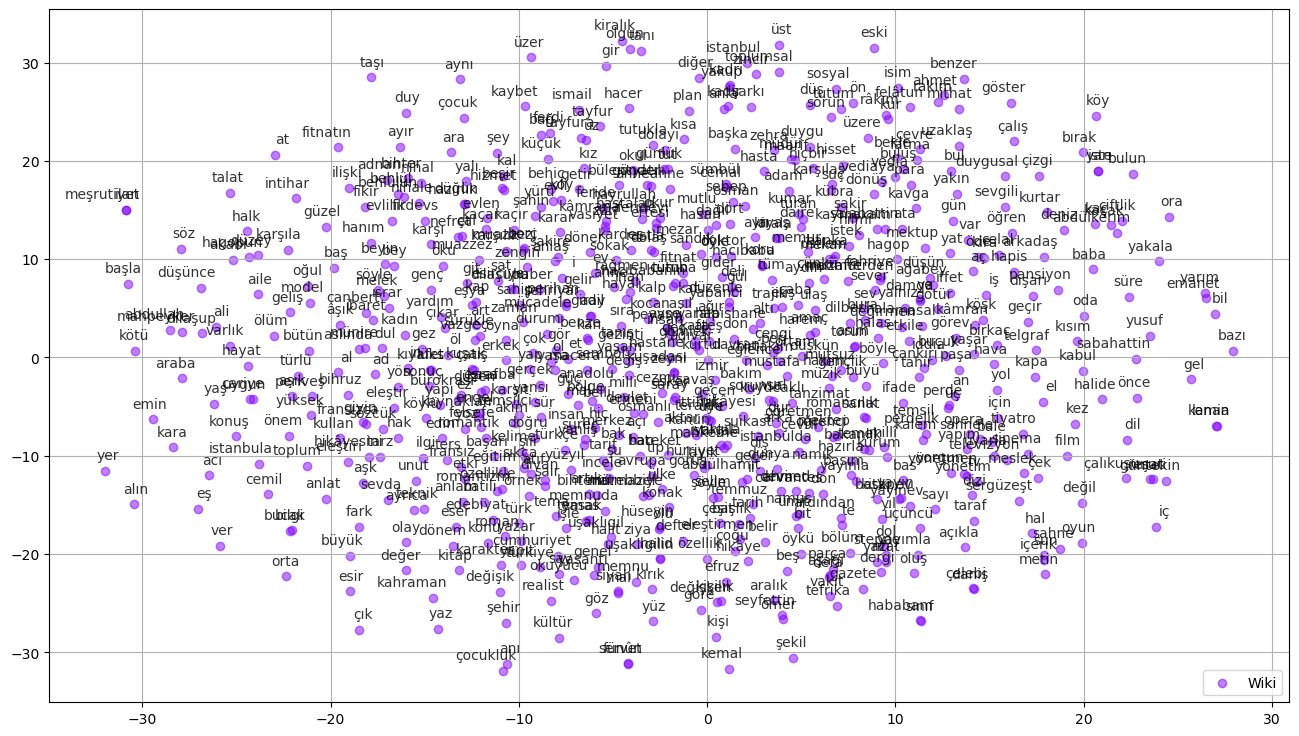

In [1496]:
tsne_plot_2d('Wiki', embeddings_ak_2d, words_ak, 0.5)

# 3D Plot

In [1302]:
tsne_wp_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_wp_3d = tsne_wp_3d.fit_transform(vector)

In [1341]:
#https://github.com/sismetanin/word2vec-tsne/blob/master/Visualizing%20Word2Vec%20Word%20Embeddings%20using%20t-SNE.ipynb
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
import os


def tsne_plot_3d_gif(title, label, embeddings, filename, a):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    #plt.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=colors, alpha=a)
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a)

    plt.title(title)

    red_patch = mpatches.Patch(color=colors[0], label=label)
    plt.legend(handles=[red_patch], loc=4)

    dirpath = tempfile.mkdtemp()
    images = []
    for angle in range(10, 360, 1):
        ax.view_init(40, angle)
        fname = os.path.join(dirpath, str(angle) + '.png')
        plt.savefig(fname, dpi=120, format='png', bbox_inches='tight')
        images.append(imageio.imread(fname))
    imageio.mimsave('3d.gif', images)
    shutil.rmtree(dirpath)




In [1342]:
tsne_plot_3d_gif('Visualizing Word Embeddings using t-SNE', 'Vikipedi Article',
                                  embeddings_wp_3d, '3d.gif', 0.1)

c:\users\abra\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  if __name__ == '__main__':


# En Benzer Kelimeler

In [1525]:
#https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d
keys = ["toplum", "sanat"]

embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in cbow_vectors.most_similar(word, topn=50):
        words.append(similar_word)
        embeddings.append(cbow_vectors[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


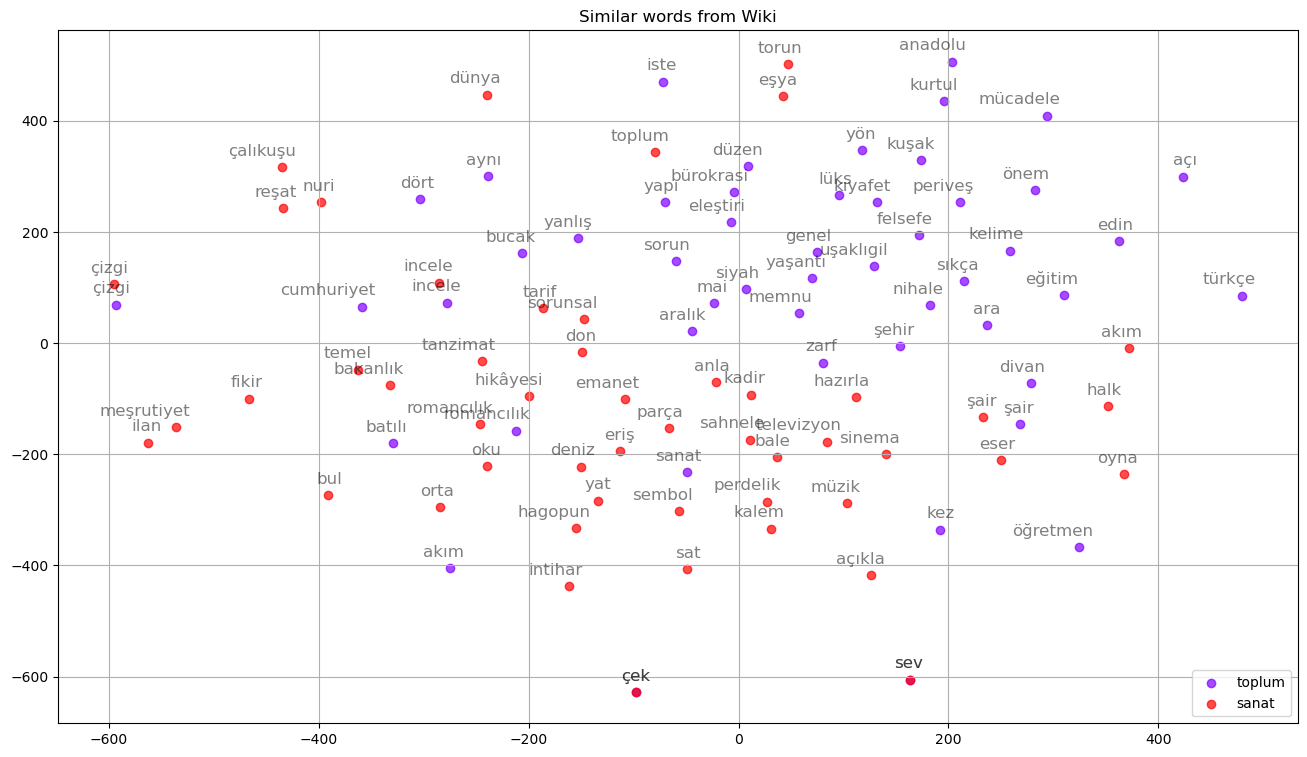

In [1526]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(10, 6),
                         textcoords='offset points', ha='right', va='bottom', size=12)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Wiki', keys, embeddings_en_2d, word_clusters, 0.7,
                       )

# En Benzer Kelimeler GIFs

In [1536]:
#https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d
import os
from sklearn.manifold import TSNE
import numpy as np


keys = ["toplum", "sanat"]
embedding_clusters_gif = []
word_clusters_gif = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in cbow_vectors.most_similar(word, topn=200):
        words.append(similar_word)
        embeddings.append(cbow_vectors[similar_word])
    embedding_clusters_gif.append(embeddings)
    word_clusters_gif.append(words)

In [1537]:
embedding_clusters_gif = np.array(embedding_clusters_gif)
n, m, k = embedding_clusters_gif.shape

In [1538]:
import matplotlib.patheffects as PathEffects
import tempfile
import imageio
import shutil

import matplotlib.pyplot as plt
import matplotlib.cm as cm

def tsne_plot_similar_words_png(title, embedding_clusters, a, filename):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(embedding_clusters)))
    i = 1
    for embeddings, color in zip(embedding_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a)
        plt.text(x.mean(), y.mean(), str(i), color='white', weight='bold', fontsize=13, path_effects=[PathEffects.withStroke(linewidth=3,
                                                                          foreground="black", alpha=0.7)])
        i += 1
    plt.title(title)
    plt.grid(True)
    plt.xlim(-200, 200)
    plt.ylim(-200, 200)
    plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    

dirpath = tempfile.mkdtemp()
images = []
for i in range(1, 30):
    fname = os.path.join(dirpath, str(i) + '.png')
    tsne_model_en_2d_gif = TSNE(perplexity=i, n_components=2, init='pca', n_iter=3500, random_state=32)
    embeddings_en_2d_gif = np.array(tsne_model_en_2d_gif.fit_transform(embedding_clusters_gif.reshape(n * m, k))).reshape(n, m, 2)
    tsne_plot_similar_words_png('Vizualizing similar words from Vikipedi Article using t-SNE (perplexity={})'.format(i), embeddings_en_2d_gif, 0.6, fname)
    images.append(imageio.imread(fname))
imageio.mimsave("2d1.gif", images, duration = 0.5)
shutil.rmtree(dirpath)